# Fish Classification Based on Sonar Response
## Exploratory Data Analysis (EDA)

This notebook explores and visualizes sonar response data to classify different fish species.


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import re
import dataframe_image as dfi

In [ ]:
df = pd.read_csv("ProcessedData/AllFishCombined_filtered.csv", low_memory=False)
# Reorder the columns for a better overview
new_order = ['fishNum', 'Spe', 'Index'] + [col for col in df.columns if col not in ['fishNum', 'Spe', 'Index']]
df = df[new_order]
df.head()

,fishNum,Spe,Index,totalLength,weight,sex,airbladderTotalLength,Ping_time,F45,F45.5,...,F255.5,F256,F256.5,F257,F257.5,F258,F258.5,F259,F259.5,F260
0,BUR001,BUR,1,465,712,1,110,15:09:21.8150,-38.814772,-38.830886,...,-35.300338,-32.164655,-28.532551,-26.435389,-24.920566,-24.920197,-26.182344,-23.195921,-20.935514,-19.696880
1,BUR001,BUR,1,465,712,1,110,15:09:21.9600,-44.603438,-42.725789,...,-26.214342,-23.973700,-22.102660,-21.368435,-21.159299,-23.350612,-33.865220,-22.276959,-17.447966,-16.242912
2,BUR001,BUR,1,465,712,1,110,15:09:22.1040,-52.359911,-54.653565,...,-26.822800,-24.543620,-22.987749,-22.066686,-20.416864,-18.283792,-15.914689,-12.739604,-12.235742,-12.369379
3,BUR001,BUR,1,465,712,1,110,15:09:22.2510,-41.738457,-41.201149,...,-30.783048,-29.365064,-28.257164,-26.975177,-24.021663,-20.363500,-17.227954,-14.199619,-14.372365,-14.995698
4,BUR001,BUR,1,465,712,1,110,15:09:22.4060,-40.327526,-40.770263,...,-25.980872,-25.457917,-24.962387,-24.180562,-21.715426,-18.732545,-16.442745,-14.235711,-15.039336,-15.783071


In [26]:
first_cols = ['fishNum', 'Spe', 'Index'] + df.columns[3:10].tolist()
last_cols = df.columns[-2:].tolist()

# Create a new DataFrame with a placeholder column
df_display = df.head()[first_cols].copy()
df_display["..."] = "..."  # Insert a placeholder
df_display = pd.concat([df_display, df.head()[last_cols]], axis=1)  # Append last columns

# Export as an image
dfi.export(df_display, "df_head_image.png", table_conversion="matplotlib")

In [ ]:
# An overview on the dataset
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")
print(df.dtypes)
print(df.describe())
print(df.describe(include=['object']))

Dataset contains 67288 rows and 273 columns.
fishNum         object
Spe             object
Index            int64
totalLength      int64
weight           int64
                ...   
F258           float64
F258.5         float64
F259           float64
F259.5         float64
F260           float64
Length: 273, dtype: object
              Index   totalLength        weight  airbladderTotalLength  \
count  67288.000000  67288.000000  67288.000000           67288.000000   
mean       8.374079    450.435085   1090.472833             156.171576   
std        5.411514    106.624430    600.548408              51.188836   
min        1.000000    190.000000     76.000000              52.000000   
25%        3.000000    390.000000    504.000000             106.000000   
50%        8.000000    479.000000   1258.000000             181.000000   
75%       13.000000    532.000000   1464.000000             199.000000   
max       21.000000    648.000000   2644.000000             278.000000   

        

In [ ]:
# Count rows where F260 is NA, grouped by fishNum
na_counts = df[df['F260'].isna()].groupby('fishNum').size().reset_index(name='NA_Count')

# Display the result
print(df.isnull().sum())
print(na_counts)


fishNum          0
Spe              0
Index            0
totalLength      0
weight           0
              ... 
F258           597
F258.5         597
F259           597
F259.5         597
F260           597
Length: 273, dtype: int64
  fishNum  NA_Count
0   LT008       479
1   LT016       118


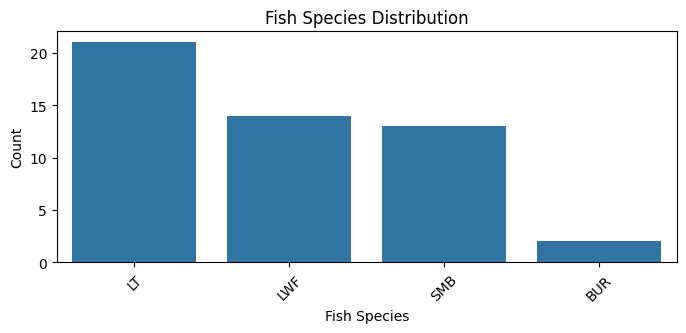

In [ ]:
#Count the distinct individuals of all sets
df_unique = df.drop_duplicates(subset=['fishNum'])
df_unique.head()

# Plot the distribution of fish species
plt.figure(figsize=(8, 3))
sns.countplot(x='Spe', data=df_unique, order=df_unique['Spe'].value_counts().index) 
plt.title("Fish Species Distribution")
plt.xlabel("Fish Species")
plt.ylabel("Count")
plt.xticks(rotation=45) 
plt.show()

In [30]:
df_filtered = df.drop(columns=['Ping_time'])

# Define aggregation rules: mean for numeric, first for non-numeric
agg_rules = {col: 'mean' if pd.api.types.is_numeric_dtype(df_filtered[col]) else 'first' for col in df_filtered.columns if col != 'fishNum'}

# Group by fishNum and apply aggregation
df_grouped = df_filtered.groupby('fishNum', as_index=False).agg(agg_rules)

# Display the first few rows of the grouped DataFrame
print(df_grouped.head())

  fishNum  Spe  Index  totalLength  weight sex  airbladderTotalLength  \
0  BUR001  BUR    1.0        465.0   712.0   1                  110.0   
1  BUR002  BUR    2.0        459.0   788.0   1                  132.0   
2   LT001   LT    1.0        454.0   930.0   2                   75.0   
3   LT002   LT    2.0        390.0   504.0   1                  153.0   
4   LT003   LT    3.0        559.0  1656.0   2                  192.0   

         F45      F45.5        F46  ...     F255.5       F256     F256.5  \
0 -46.479146 -46.629557 -46.066176  ... -29.060127 -28.443539 -27.567882   
1 -51.093437 -51.122888 -51.061878  ... -34.172427 -32.880550 -31.683651   
2 -46.645407 -46.367350 -46.199488  ... -33.118848 -32.515203 -32.140573   
3 -47.560521 -47.215797 -46.932365  ... -37.753181 -37.507503 -37.102629   
4 -46.168306 -45.968098 -45.782728  ... -33.244680 -32.686375 -32.061705   

        F257     F257.5       F258     F258.5       F259     F259.5       F260  
0 -26.713292 -25.613016

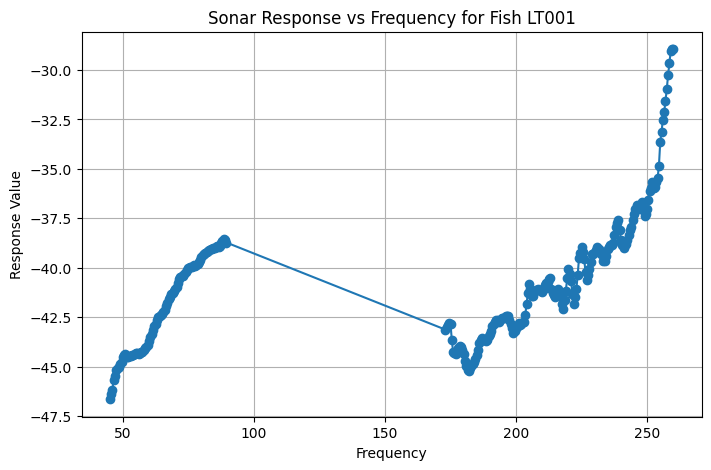

In [31]:
# Filter for fishNum == 'LT001'
df_lt001 = df_grouped[df_grouped['fishNum'] == 'LT001']

# Extract columns matching the format 'F{frequency}'
freq_columns = [col for col in df_lt001.columns if re.match(r'^F\d+(\.\d+)?$', col)]

# Convert column names to numeric frequencies
frequencies = [float(col[1:]) for col in freq_columns]  # Remove 'F' and convert to float

# Get corresponding values
values = df_lt001[freq_columns].values.flatten()  # Convert DataFrame row to a NumPy array

# Plot
plt.figure(figsize=(8, 5))
plt.plot(frequencies, values, marker='o', linestyle='-')
plt.xlabel("Frequency")
plt.ylabel("Response Value")
plt.title("Sonar Response vs Frequency for Fish LT001")
plt.grid(True)
plt.show()


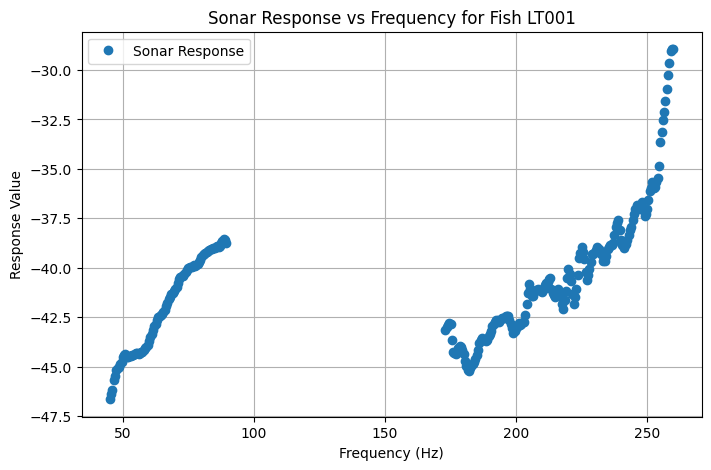

In [32]:
freq_columns = [col for col in df_lt001.columns if re.match(r'^F\d+(\.\d+)?$', col)]

# Convert column names to numeric frequencies
frequencies = np.array([float(col[1:]) for col in freq_columns])  # Remove 'F' and convert to float
values = df_lt001[freq_columns].values.flatten()  # Get corresponding values

# Sort by frequency (just in case)
sorted_indices = np.argsort(frequencies)
frequencies = frequencies[sorted_indices]
values = values[sorted_indices]

# Create gaps where frequencies are missing (between 90 and 170)
plt.figure(figsize=(8, 5))
plt.plot(frequencies, values, marker='o', linestyle='None', label="Sonar Response")  # No line to prevent fitting

plt.xlabel("Frequency (Hz)")
plt.ylabel("Response Value")
plt.title("Sonar Response vs Frequency for Fish LT001")
plt.grid(True)
plt.legend()
plt.show()


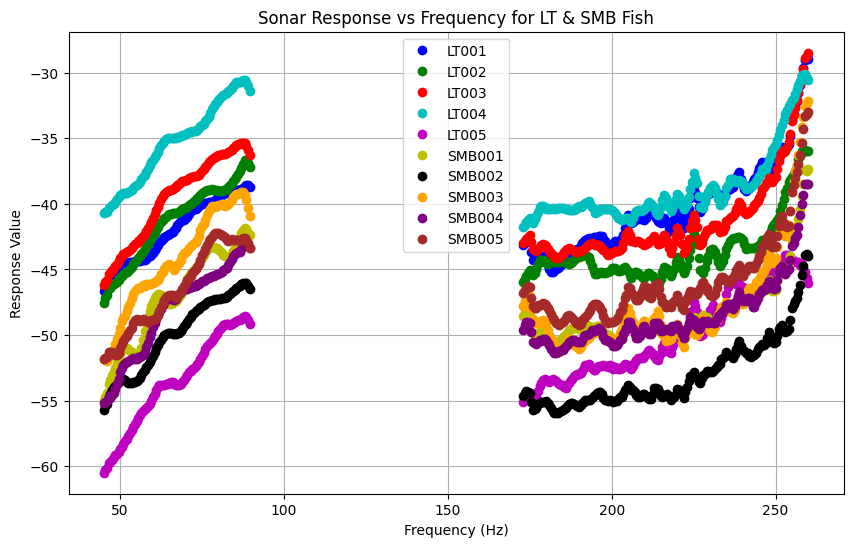

In [33]:
# List of fish to plot
fish_list = ['LT001', 'LT002', 'LT003', 'LT004', 'LT005', 'SMB001', 'SMB002', 'SMB003', 'SMB004', 'SMB005']

# Define colors for each fish (optional, for clarity)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown']

# Initialize plot
plt.figure(figsize=(10, 6))

# Loop through each fish and plot their sonar response
for i, fish in enumerate(fish_list):
    df_fish = df_grouped[df_grouped['fishNum'] == fish]
    
    # Extract columns matching 'F{frequency}'
    freq_columns = [col for col in df_fish.columns if re.match(r'^F\d+(\.\d+)?$', col)]
    
    if not freq_columns:
        continue  # Skip if no frequency columns found
    
    # Convert column names to numeric frequencies
    frequencies = np.array([float(col[1:]) for col in freq_columns])
    values = df_fish[freq_columns].values.flatten()

    # Sort data by frequency (if not already sorted)
    sorted_indices = np.argsort(frequencies)
    frequencies = frequencies[sorted_indices]
    values = values[sorted_indices]

    # Plot without line to preserve gaps
    plt.plot(frequencies, values, marker='o', linestyle='None', label=fish, color=colors[i % len(colors)])

# Customize plot
plt.xlabel("Frequency (Hz)")
plt.ylabel("Response Value")
plt.title("Sonar Response vs Frequency for LT & SMB Fish")
plt.grid(True)
plt.legend()
plt.show()


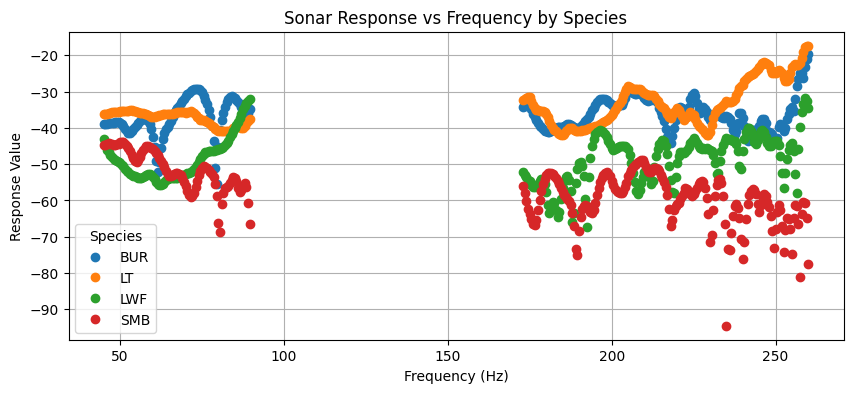

In [34]:
spe_groups = df_filtered['Spe'].unique()

plt.figure(figsize=(10, 4))

# Loop over each species group
for i, spe in enumerate(spe_groups):
    # Filter the grouped DataFrame for the current species
    df_spe = df_filtered[df_filtered['Spe'] == spe]
    
    # Identify frequency columns (names starting with 'F' followed by a number)
    freq_columns = [col for col in df_spe.columns if re.match(r'^F\d+(\.\d+)?$', col)]
    
    # If no frequency columns are found, skip this group
    if not freq_columns:
        continue
    
    # Convert the frequency parts (remove the leading 'F') to float numbers
    frequencies = np.array([float(col[1:]) for col in freq_columns])
    # Get the corresponding response values from the DataFrame row
    values = df_spe[freq_columns].values.flatten()
    
    # Sort the frequencies and corresponding values (if needed)
    sorted_indices = np.argsort(frequencies)
    frequencies = frequencies[sorted_indices]
    values = values[sorted_indices]
    
    # Plot markers only (no line connection) so that gaps in frequencies appear as empty
    plt.plot(frequencies, values, marker='o', linestyle='None', label=str(spe))

plt.xlabel("Frequency (Hz)")
plt.ylabel("Response Value")
plt.title("Sonar Response vs Frequency by Species")
plt.grid(True)
plt.legend(title="Species")
plt.show()

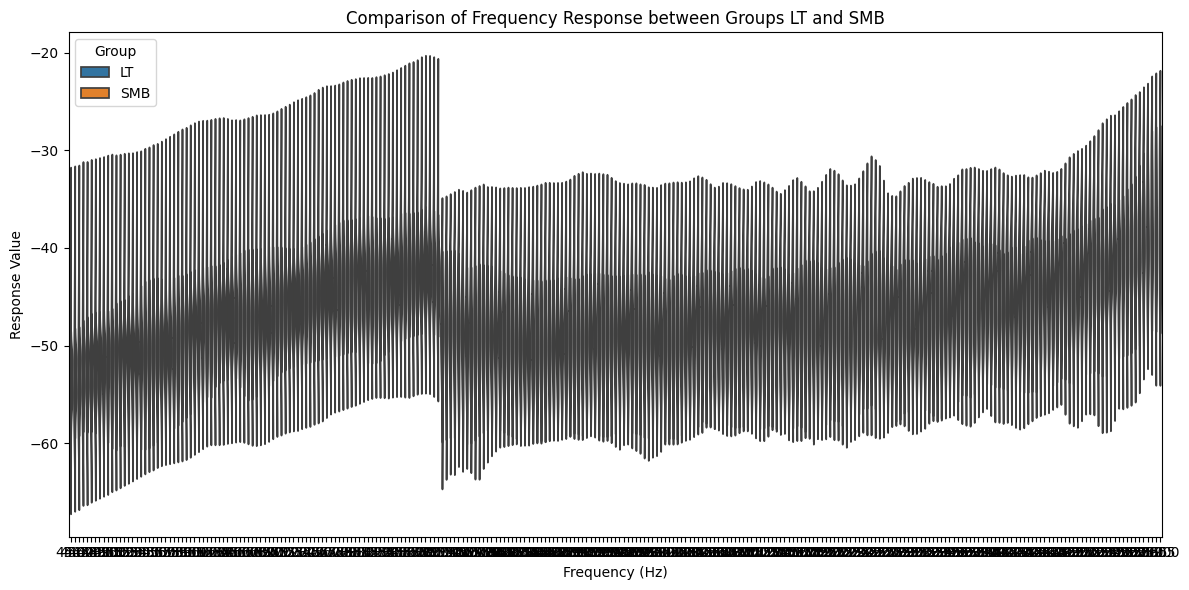

In [35]:
df_melted = df_grouped.melt(id_vars=['Spe'],
                                value_vars=freq_columns,
                                var_name='Frequency',
                                value_name='Response')

# 3. Convert the 'Frequency' column from strings (e.g., "F88.5") to numeric values.
df_melted['Frequency'] = df_melted['Frequency'].str[1:].astype(float)

# 4. Create a new column 'Group' by extracting the prefix from 'Spe'.
#    We assume that if 'Spe' starts with "LT" then Group is LT, and if it starts with "SMB" then Group is SMB.
df_melted['Group'] = df_melted['Spe'].apply(
    lambda x: 'LT' if str(x).startswith('LT') else ('SMB' if str(x).startswith('SMB') else 'Other')
)

# 5. Filter the melted data to include only the two groups of interest.
df_melted = df_melted[df_melted['Group'].isin(['LT', 'SMB'])]

# 6. Create a violin plot comparing the distributions of Response values for each frequency between groups.
plt.figure(figsize=(12, 6))
sns.violinplot(x='Frequency', y='Response', hue='Group', data=df_melted, split=True, inner="quartile")

plt.title("Comparison of Frequency Response between Groups LT and SMB")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Response Value")
plt.legend(title='Group')
plt.tight_layout()
plt.show()

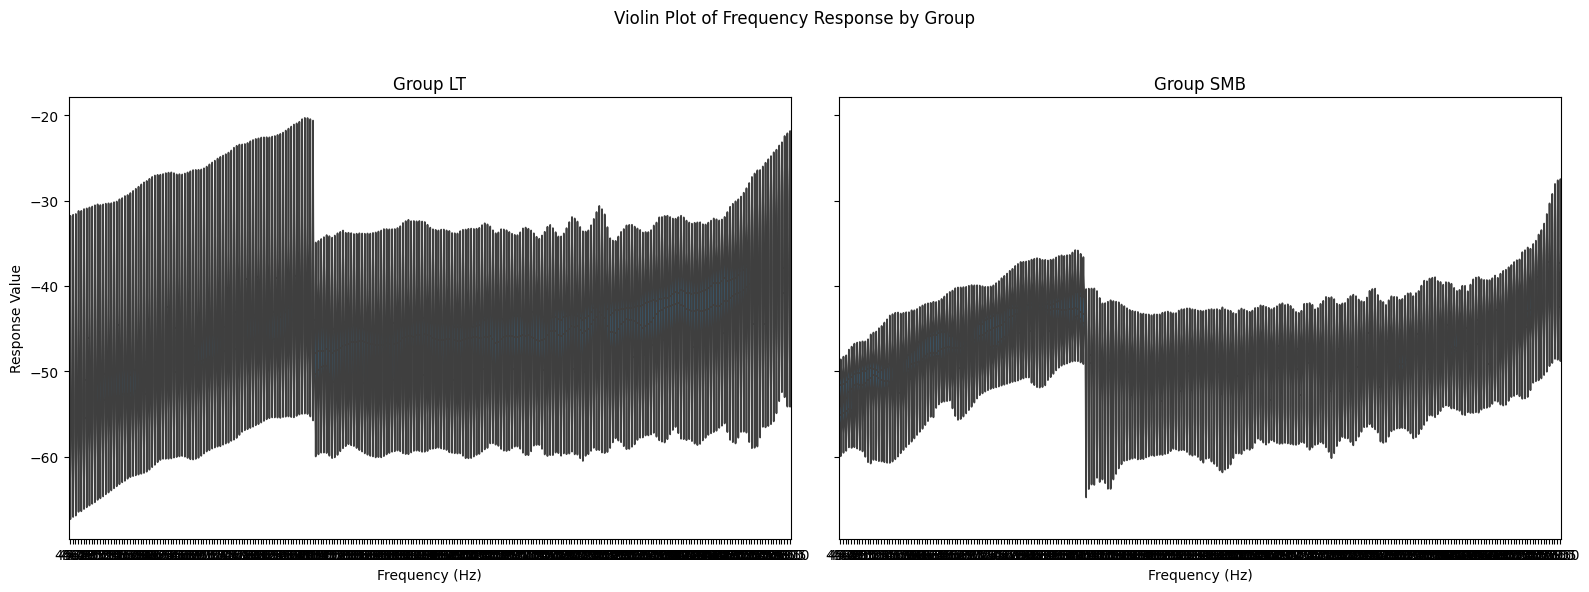

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Violin plot for the LT group.
sns.violinplot(ax=axes[0],
               data=df_melted[df_melted['Group'] == 'LT'],
               x='Frequency',
               y='Response',
               inner="quartile")
axes[0].set_title("Group LT")
axes[0].set_xlabel("Frequency (Hz)")
axes[0].set_ylabel("Response Value")

# Violin plot for the SMB group.
sns.violinplot(ax=axes[1],
               data=df_melted[df_melted['Group'] == 'SMB'],
               x='Frequency',
               y='Response',
               inner="quartile")
axes[1].set_title("Group SMB")
axes[1].set_xlabel("Frequency (Hz)")
# The y-label is shared, so no need to set it again on the right subplot.

plt.suptitle("Violin Plot of Frequency Response by Group")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


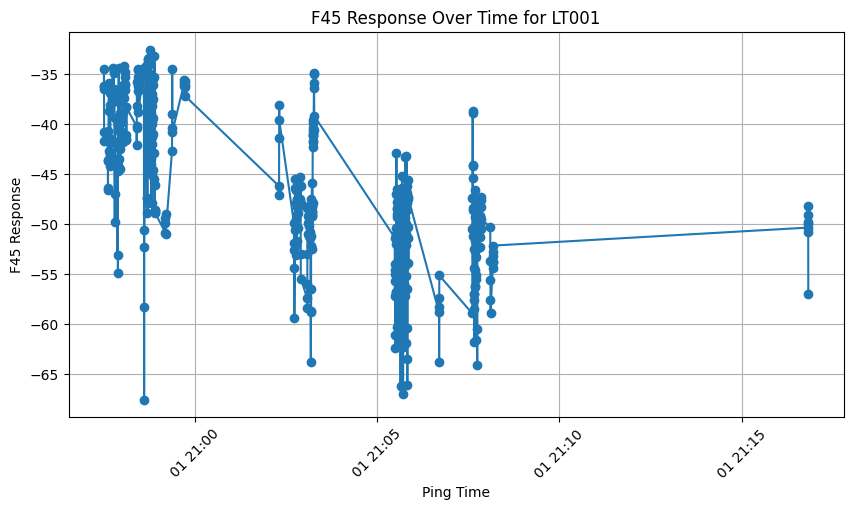

In [37]:
df['Ping_time'] = df['Ping_time'].astype(str)
df['F45'] = pd.to_numeric(df['F45'], errors='coerce')  # Convert F45 to numeric, forcing errors to NaN

# Filter for fishNum == 'LT001'
df_lt001 = df[df['fishNum'] == 'LT001'].copy()

# Convert Ping_time to a proper datetime format
df_lt001['Ping_time'] = pd.to_datetime(df_lt001['Ping_time'], format=' %H:%M:%S.%f')

# Sort values by time to avoid incorrect plot order
df_lt001 = df_lt001.sort_values(by='Ping_time')

# Plot
plt.figure(figsize=(10, 5))
plt.plot(df_lt001['Ping_time'], df_lt001['F45'], marker='o', linestyle='-')

# Formatting
plt.xlabel("Ping Time")
plt.ylabel("F45 Response")
plt.title("F45 Response Over Time for LT001")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)

plt.show()

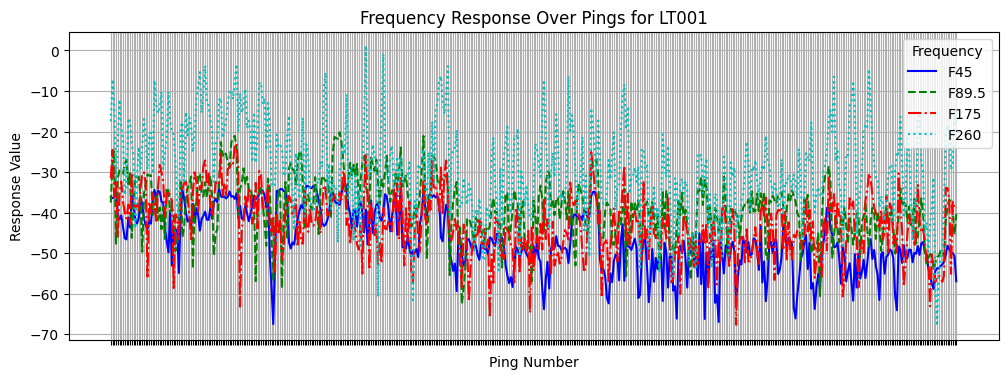

In [ ]:
freq_columns = ['F45', 'F89.5', 'F175', 'F260']

# Convert frequency columns to numeric (coercing errors to NaN)
for col in freq_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Filter for fishNum == 'LT001'
df_lt001 = df[df['fishNum'] == 'LT001'].copy()

# Drop NaT values in Ping_time and sort by time
df_lt001 = df_lt001.dropna(subset=['Ping_time']).sort_values(by='Ping_time')

# Plot
fig, ax = plt.subplots(figsize=(12, 4))

# Define colors and line styles
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
linestyles = ['-', '--', '-.', ':', '-', '--', '-.']

# Plot each frequency response against Ping_time
for i, col in enumerate(freq_columns):
    ax.plot(df_lt001['Ping_time'], df_lt001[col], label=col, color=colors[i], linestyle=linestyles[i])

# Formatting
ax.set_xlabel("Ping Number")  # Rename axis to indicate pings
ax.set_ylabel("Response Value")
ax.set_title("Frequency Response Over Pings for LT001")
ax.legend(title="Frequency")

# Hide x-axis labels but keep the axis
ax.set_xticklabels([])  # Removes values while keeping axis
#ax.grid(True)

plt.show()


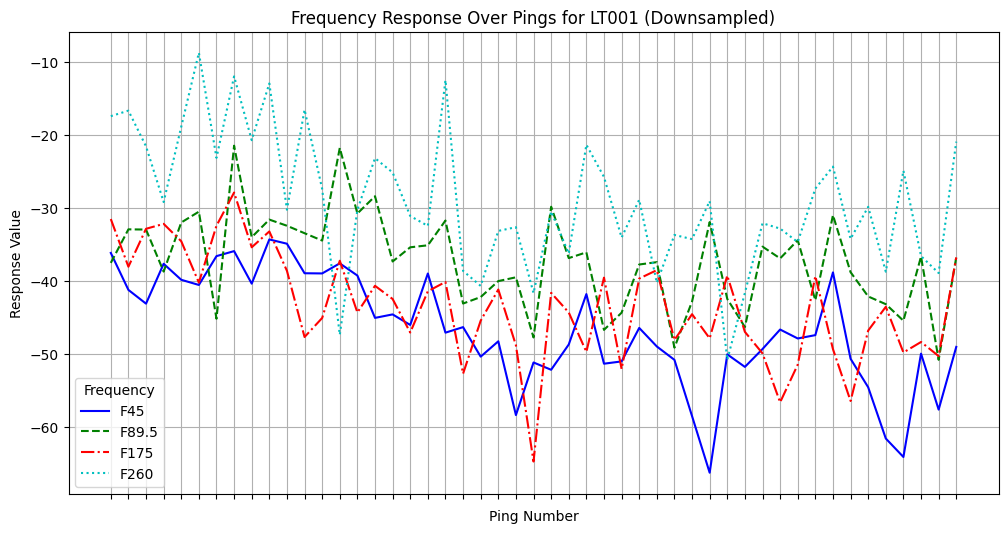

In [39]:
# Downsample: Keep every 10th row
df_downsampled = df_lt001.iloc[::10, :]

fig, ax = plt.subplots(figsize=(12, 6))

for i, col in enumerate(freq_columns):
    ax.plot(df_downsampled['Ping_time'], df_downsampled[col], label=col, color=colors[i], linestyle=linestyles[i])

ax.set_xlabel("Ping Number")
ax.set_ylabel("Response Value")
ax.set_title("Frequency Response Over Pings for LT001 (Downsampled)")
ax.legend(title="Frequency")

# Hide x-axis labels but keep the axis
ax.set_xticklabels([])
ax.grid(True)

plt.show()

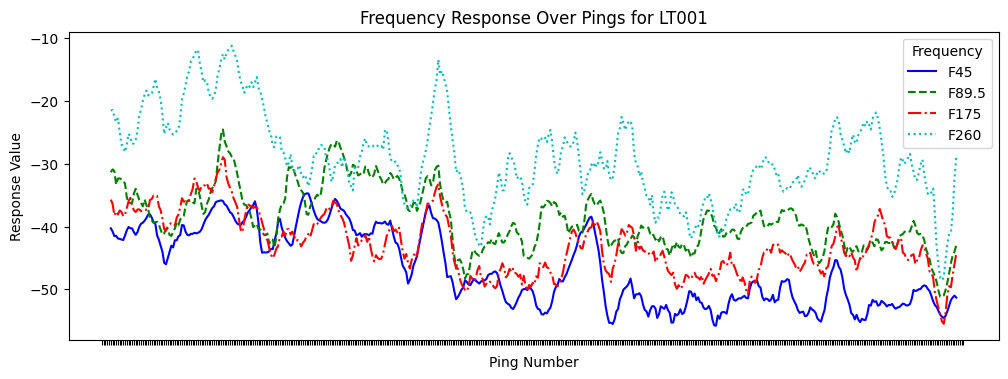

In [44]:
# Apply rolling average with window size 10
df_smoothed = df_lt001.copy()
df_smoothed[freq_columns] = df_smoothed[freq_columns].rolling(window=10, center=True).mean()

fig, ax = plt.subplots(figsize=(12, 4))

for i, col in enumerate(freq_columns):
    ax.plot(df_smoothed['Ping_time'], df_smoothed[col], label=col, color=colors[i], linestyle=linestyles[i])

ax.set_xlabel("Ping Number")
ax.set_ylabel("Response Value")
ax.set_title("Frequency Response Over Pings for LT001")
ax.legend(title="Frequency")

# Hide x-axis labels but keep the axis
ax.set_xticklabels([])
# ax.grid(True)

plt.show()


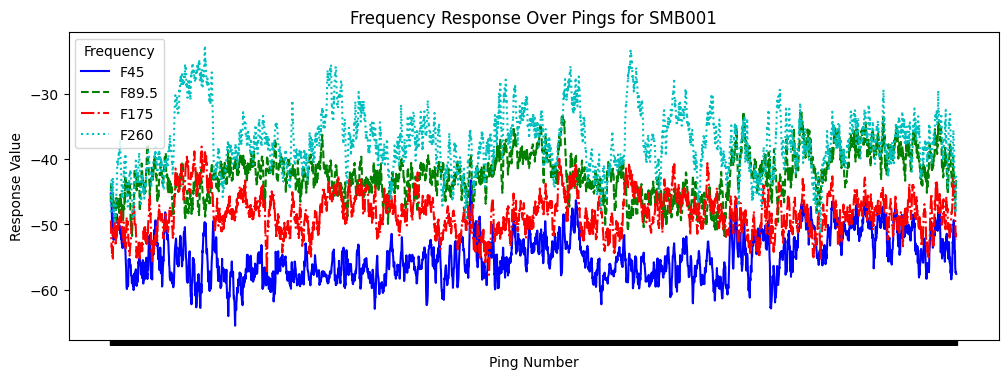

In [45]:
# Filter for fishNum == 'SMB001'
df_smb001 = df[df['fishNum'] == 'SMB001'].copy()

# Drop NaT values in Ping_time and sort by time
df_smb001 = df_smb001.dropna(subset=['Ping_time']).sort_values(by='Ping_time')

# Apply rolling average with window size 10
df_smb001[freq_columns] = df_smb001[freq_columns].rolling(window=10, center=True).mean()

fig, ax = plt.subplots(figsize=(12, 4))

for i, col in enumerate(freq_columns):
    ax.plot(df_smb001['Ping_time'], df_smb001[col], label=col, color=colors[i], linestyle=linestyles[i])

ax.set_xlabel("Ping Number")
ax.set_ylabel("Response Value")
ax.set_title("Frequency Response Over Pings for SMB001")
ax.legend(title="Frequency")

# Hide x-axis labels but keep the axis
ax.set_xticklabels([])
# ax.grid(True)

plt.show()


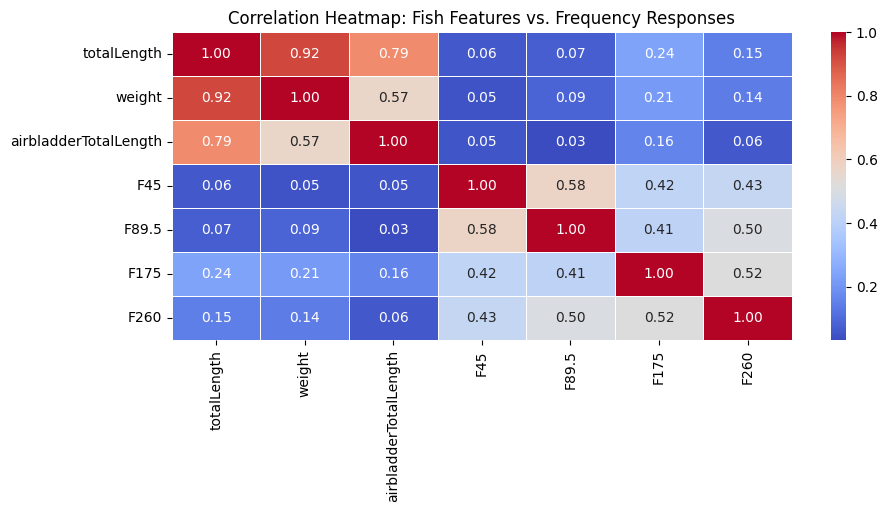

In [42]:
corr_columns = ['totalLength', 'weight', 'airbladderTotalLength'] + freq_columns

# Compute correlation matrix
corr_matrix = df[corr_columns].corr(method='pearson')  # Use 'spearman' if data is not normally distributed

# Plot heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap: Fish Features vs. Frequency Responses")
plt.show()


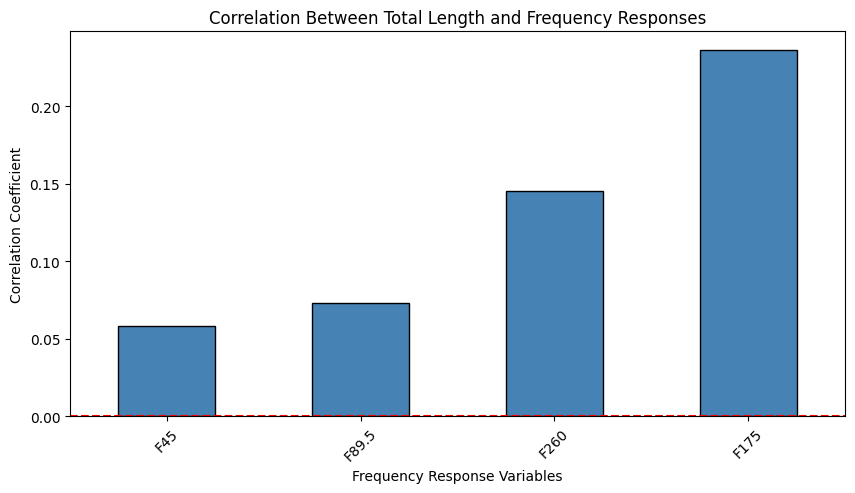

In [43]:
corr_columns = ['totalLength'] + freq_columns

# Compute correlation matrix
corr_matrix = df[corr_columns].corr()

# Extract only the correlation of `totalLength` with frequencies
corr_values = corr_matrix.loc['totalLength', freq_columns]

plt.figure(figsize=(10, 5))
corr_values.sort_values().plot(kind='bar', color='steelblue', edgecolor='black')

plt.title("Correlation Between Total Length and Frequency Responses")
plt.xlabel("Frequency Response Variables")
plt.ylabel("Correlation Coefficient")
plt.axhline(0, color='red', linestyle='dashed')  # Reference line for zero correlation
plt.xticks(rotation=45)  # Rotate labels for readability
plt.show()